In [193]:
%load_ext autoreload
%autoreload 2

from lib import *

Torch device: cuda:0
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
train_data = torchvision.datasets.MNIST(root='./data',
                   train=True,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

test_data = torchvision.datasets.MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

train_X, train_Y = train_data.data.numpy(), train_data.targets.numpy()
test_X, test_Y = test_data.data.numpy(), test_data.targets.numpy()

#reduced size dataset can be used for quick testing of computationally intesive steps
train_X_sm, train_Y_sm = train_X[:1000,:], train_Y[:1000]

Torch device: cuda:0


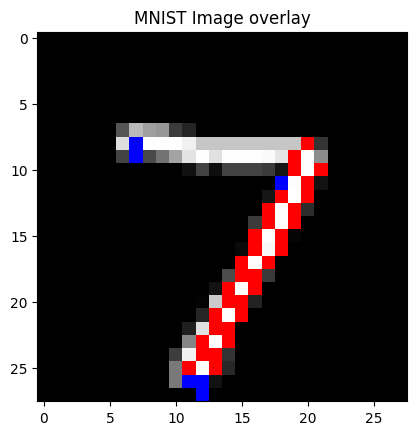

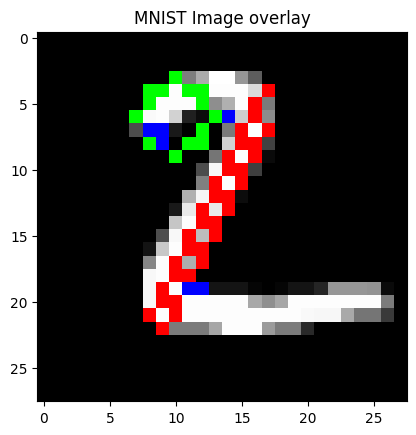

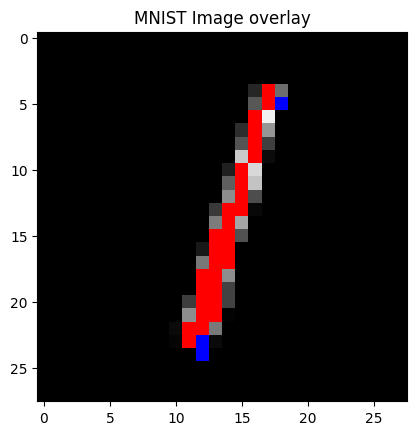

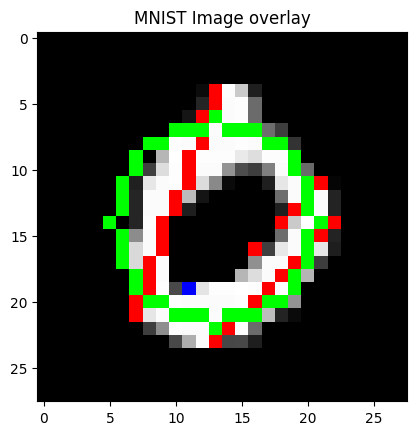

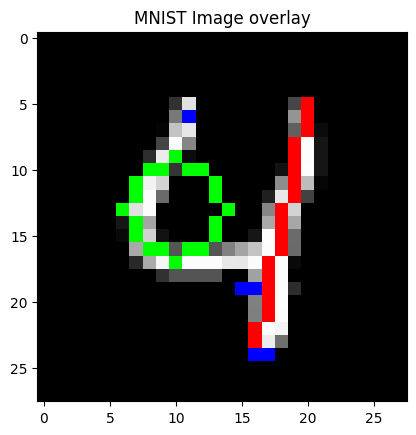

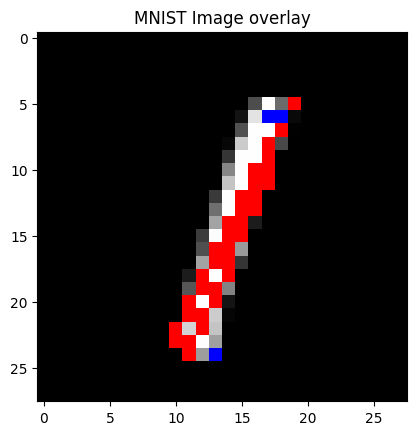

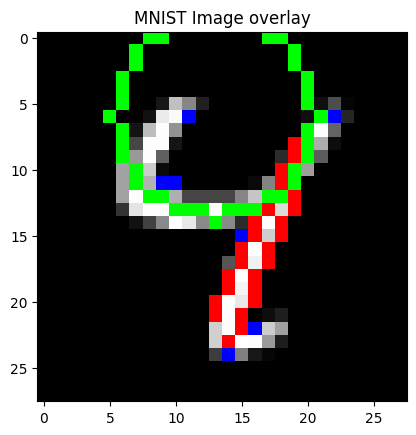

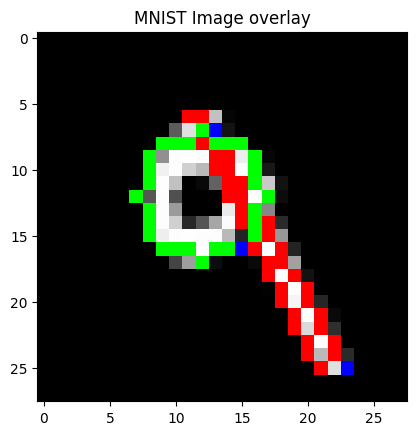

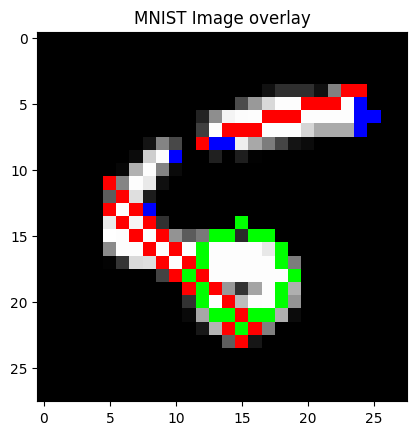

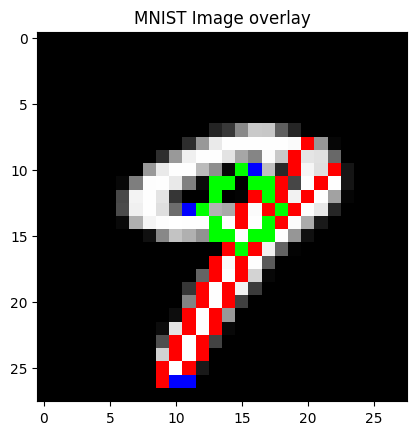

In [166]:
for i in range(10):
    show_overlay(test_X[i],
                 get_lines(test_X[i]),
                 get_circles(test_X[i]),
                 get_corners(test_X[i]))

In [217]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_X.reshape(60000,-1),train_Y)
clf.score(test_X.reshape(10000,-1),test_Y)

0.5957

In [204]:
train_X_features = np.array([get_features(x) for x in train_X])
test_X_features = np.array([get_features(x) for x in test_X])

In [219]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_X_features.reshape(60000,-1),train_Y)
clf.score(test_X_features.reshape(10000,-1),test_Y)

0.4679

In [222]:
dot_data = sklearn.tree.export_graphviz(
    clf, 
    out_file=None, 
    filled=True,
    #class_names=['0','1','2','3','4','5','6','7','8','9'],
    feature_names=get_feature_names()
)
graph = graphviz.Source(dot_data, format="svg")
graph.render("dt-viz-depth-4")

'dt-viz-depth-4.svg'

## TODO:
- Get the proper class name order for decision tree visualization (order that digits appear in test data)
- Try to understand dt visualization by looking at examples, try to see if it learned anything intuitive
- Try sorting each of the features (lines,circles,corners) based on their position in the image to see if that
  improves accuracy. (You'd think always having the upper-most circle be Ci1 - for example - would be helpful)
- Test any other pre-processing that you thing might improve accuracy
- (OPTIONAL) Hyperparameter tuning
    - Train on training data, optimize parameters (like thresholds etc in the computer vision funcs)
      based on cross-validation sklearn parameter grid search
- Write the report
- Do the demo